<a href="https://colab.research.google.com/github/Shubha012/DSA/blob/main/MAGIC_tut1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!git config --global github.user 'shubha012'

In [20]:
!git


usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           [--super-prefix=<path>] [--config-env=<name>=<envvar>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone     Clone a repository into a new directory
   init      Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add       Add file contents to the index
   mv        Move or rename a file, a directory, or a symlink
   restore   Restore working tree files
   rm        Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect    Use binary search to find th

In [21]:
! git init


Reinitialized existing Git repository in /content/.git/


In [22]:
!git add .

In [23]:
!git config --global user.email "shubha126bteceai22@igdtuw.ac.in"
!git config --global user.name "Shubha"

In [24]:
!git commit -m 'first commit'

On branch main
nothing to commit, working tree clean


In [25]:
!git branch -m main

In [26]:
!git remote add origin https://github.com/Shubha012/magic.git

error: remote origin already exists.


In [28]:
!git push --set-upstream origin main

fatal: could not read Username for 'https://github.com': No such device or address


In [29]:

!git push -u origin

fatal: The current branch main has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin main



In [ ]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

UCI machine learning repository -- website having lots of data along with its information. https://archive.ics.uci.edu/datasets .

In this code using Magic_gaama_telescope dataset
2 particles are used - gamma, hydron

In [ ]:
pd.read_csv("magic04.data")
## no labels are there. Therefore asign labels in this from the website.

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [ ]:
## assigning labels in the columns
col = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names = col)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


using this dataset we are going to predict whether the particle is 'g' or 'h'. So we need to classify the data. Hence k/a as clasifiers. Here, flength -- fdist are feature values using which we predict class.

In [ ]:
df['class'].unique()
## g - gamma , h - hydron

array(['g', 'h'], dtype=object)

In [ ]:
## since computer is good at working with numbers. therefore we are converting classes into number 0,1
## 1--gamma, 0-hydron or vice versa
df['class'] = (df['class'] == 'g').astype(int)  ## id it'as true thamn it will convert g in 1 and h in 0 (can do this vice versa also).

In [ ]:
df.sample(8)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
17774,176.2820,71.4843,3.6873,0.1329,0.0706,-59.2747,-142.8410,-58.7582,36.9137,312.8560,0
2494,112.7040,75.6026,4.3784,0.0668,0.0340,71.7430,72.1956,40.1500,6.2016,310.3950,1
5220,20.8203,14.9753,2.5038,0.4828,0.2618,22.2022,14.7743,2.7786,36.8492,178.5390,1
2261,12.9396,11.0653,2.1508,0.7279,0.4558,14.1380,-7.2703,0.4439,72.5300,220.1570,1
16596,89.9106,22.5123,2.8648,0.2102,0.1140,167.9100,-92.5395,-16.2772,39.4007,68.3801,0
2048,19.7891,12.9889,2.4191,0.5067,0.2571,14.5680,5.0107,3.8875,10.1390,75.7494,1
2884,46.3950,20.7354,2.9941,0.2291,0.1151,-5.4724,-22.4582,-11.9183,9.8102,204.4070,1
3783,34.5434,10.6311,2.6985,0.4004,0.2272,48.8336,7.9539,5.2069,12.0162,151.2140,1


Supervised learning

input --> Model --> output
input - k/a feature vector.
model - used to train the dataset.
output - label that is going to predict.

*can have different type of features* :
***a. Qualitative***: categorical data(finite number of categories or groups) eg gender(F/M), bunch of diff nationality.
it can be **nominal data** ie have no order like F-0 and M-1 it can be vice versa also. use one hot encoding to represent this. (convert data into numrical form). Says that if it matches than put it equals to 1.
eg - [Usa, India, Canada, France]
USA = [1,0,0,0]
India = [0,1,0,0]
Canada = [0,0,1,0]
France = [0,0,0,1]

it can be **ordinal data** ie have some order. eg rating (poor(0), medium(1), great(2)). order can be reversed but it's always in some order.

***b. Quantative***: numerical value data can be discrete or continuous.
eg temperature, weight, height.

Types of predictions our model can output:
1. classification - predict discete class. (eg ice-creme, hotdog, cold-drink) , plant species -- multi-class classification.
means more than 1 class.
-- binary class - have only 2 class - eg(ice-creme, cold drink), eg(cat,dog). , positive/negative.

2. regression - predict continuous values. eg price of house tomorrow, temperature tomorrow.

Models --
all combined feature vectors(single col) are known as to be feature matrix.
X = feature matrix
Y = target value/label
each row of feature matrix is fed into the model. And the model will make some sort of predictions. And we compare the prediction with the actual value of y that is present in the dataset. Find the error and reduce it in next iteration. **This whole process is known as training of model**.


---
What if we use whole data for training?? That's definetely not an optimal choice. Since whole are dataset is used up in training. Therefore if we use the same dataset for testing purpose then the output is 100% which is not true. Due to this reason we divide are dataset into 3 parts :-
1. Training set - training dataset is feeded into the model. It makes the predictions which is compared with the original dataset and error/loss is calculated. ---> k/a training
2. Validation dataset - after each iteration/epoch of training. Validation dataset is used to find the accuracy. Model having least accuracy is passed and used as final dataset.
eg = model 1 : loss = 1.3       model2 : loss = 1.5
     model 3 : loss = 0.5       model 4 : loss = 0.9
     Model 3 is used since have least loss.

3. Test set - take model 3 run our test set check accuracy and performance of the model. Gives how generalize the model is.



---
Metrices of performance

a. **Loss**

loss = predicted value - actual value
LOSS FUNCTIONS -

L1 loss = sum( |yreal - ypredicted| )

 -> as the difference increases the loss increases.

L2 loss = sum( (yreal - ypredicted)^2 )
-> when the difference is low penality decreases very much asm compared to L1 loss. But if the difference increases too much then the penality will increases very much Hence it'll not work in outliers. ( as if errors are less than 1 squaring it will decreases it's value but if it's greater then 1 the squaring it will increse it's value).

Binary cross entropy loss = -1/N * sum(yreal *log(ypredicted)+ (1-yreal) *log(1-ypredicted)). -> used in binary classification. (used alot).  

b. Accuracy - how much are data is accurate means predicted value is correct.


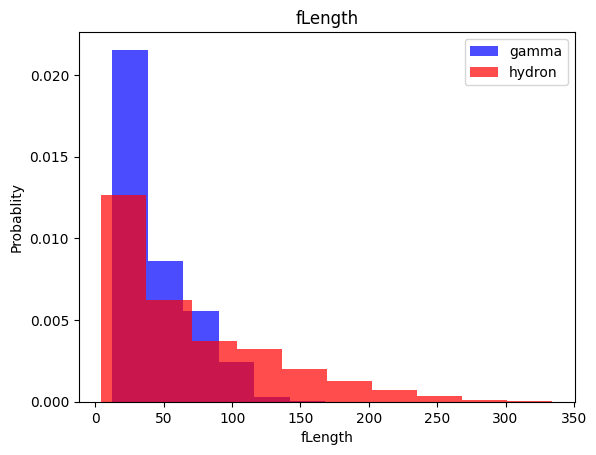

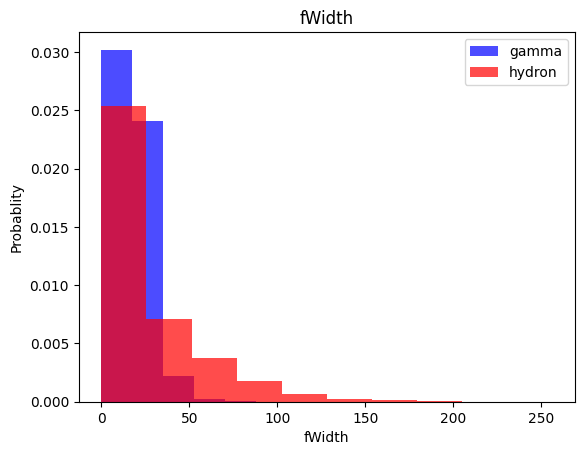

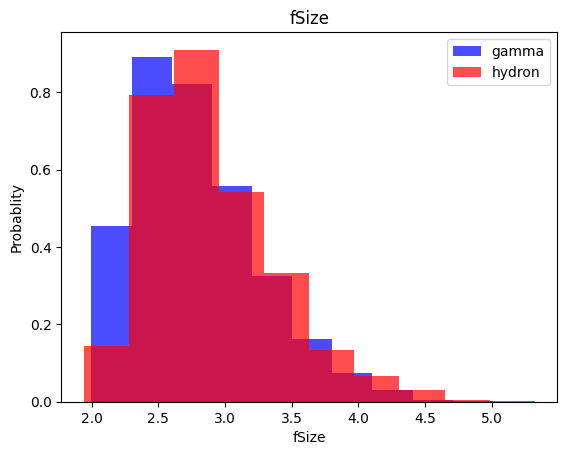

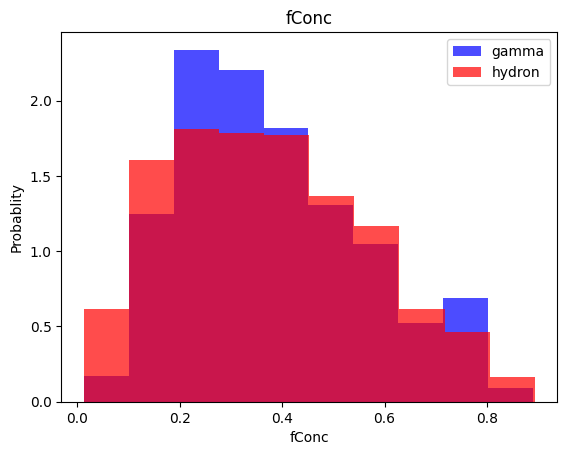

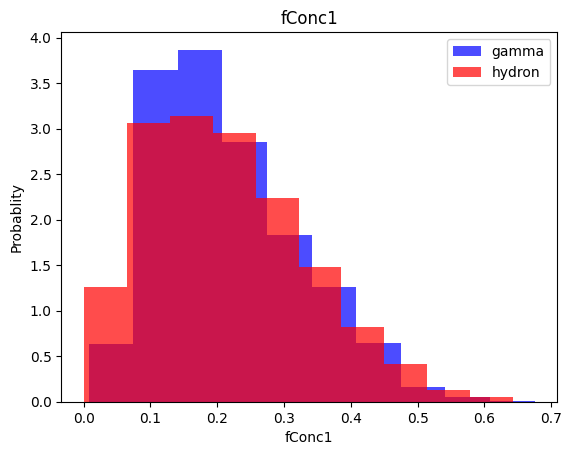

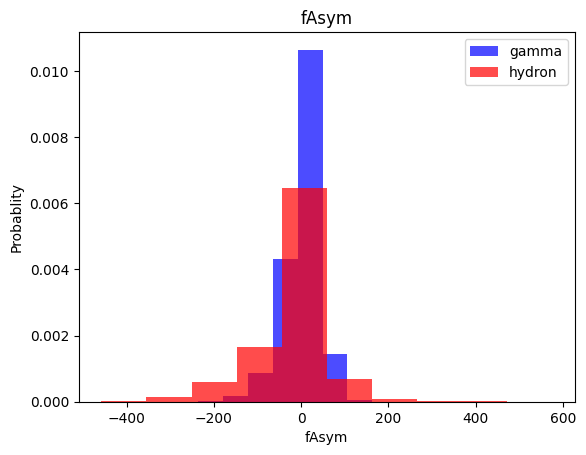

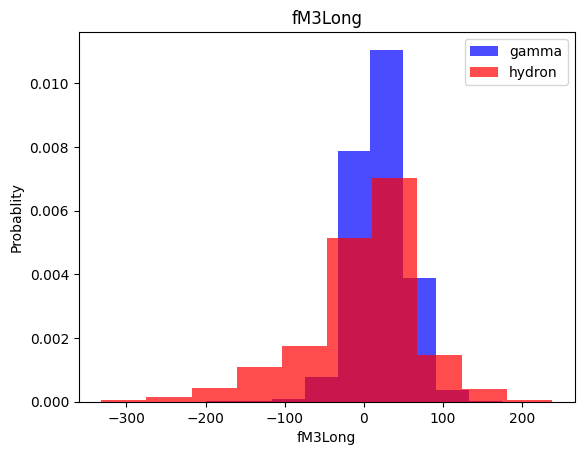

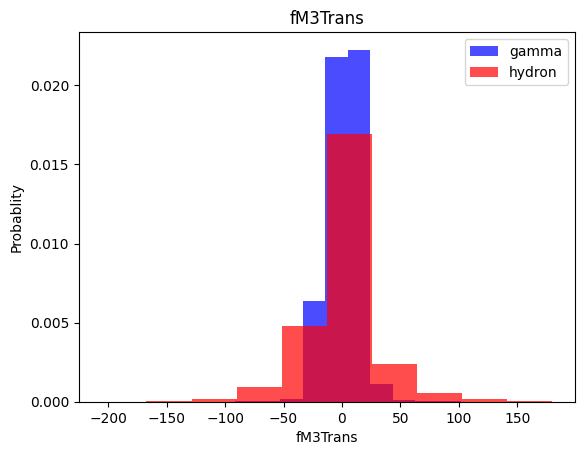

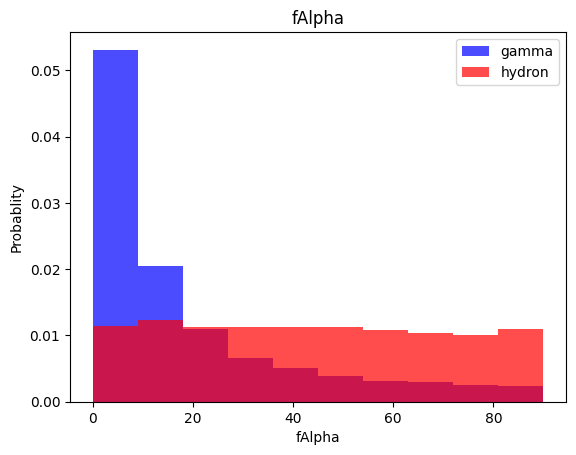

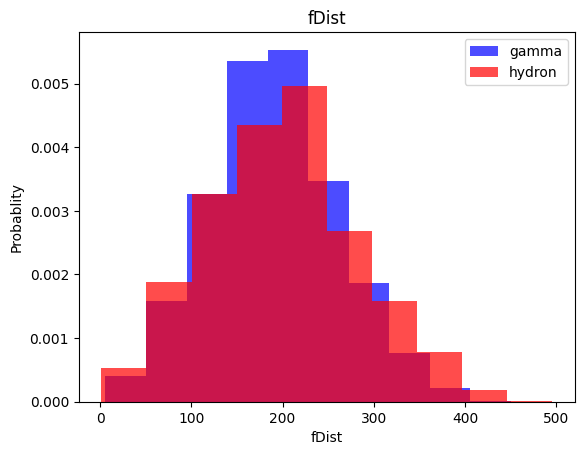

In [ ]:
## visualizing the data
for label in col[:-1]:
  plt.hist(df[df['class']==1][label], color = 'blue', alpha = 0.7, label='gamma', density=True)
  plt.hist(df[df['class']==0][label], color = 'red', alpha = 0.7, label='hydron', density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probablity')
  plt.legend()
  plt.show()

# creating training, testing, validation of dataset.

In [ ]:
train, valid, test = np.split(df.sample(frac=1), (int(0.6*len(df)), int(0.8*len(df))))
# df.sample(frac=1) --> refers that shuffle the whole dataset - ranges b/w 0-1-- 0.8 means only 80% of data is shuffled and so on
# 1st split at 60% and 2nd split at 80%. 1st split --> training data, 2nd split--> validating data, 3rd split--> testing data
# syntax - np.split(dataframe, (split))
# df.sample(frac=0-1, random_state=42) --> if random state is given then shuffling will be same everytime.

In [ ]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7347
4065


### standardscaler
- preprocessing class of scikit learn lib.
- used for standardizing features by removing the mean and scaling to unit variance.
-- removing mean - mean of each col is calculated and subtracted from each data points
-- scaling to unit variance - variance = spread/dispersion.(how much value is deviated from the mean). Each feature is scaled after dividing it by it's satndard deviation. After the variance of each feature becomes 1.

formula = (xi - mean(x))/std(x)
- it brings all the values on the same level. So that feature on larger scale donot dominate over features on smaller scale.

// initialization -

libray = from sklearn.preprocessing import StandardScaler

creating instance : scaler = StandardScaler()

while creating instance it's empty not contains anything until the data is fitted into it.

// fitting standardscaler to the data.
X_scaled = scaler.fit_transform(X)

scaler object uses fit_transfrom method to standralize the feature matrix X. During fiting the mean and standard deviation is calculated and stored in the scaler object. Transfrom part standardize the X using the stored value.





Here the differnce b/w the number of hydron and gamma particles in the dataset that leads to biased desicion which is not a good practice. Not good for training data. But can be good for testing and validation of data. because while testing data should be random.
## OverSampling
- it refers to  balance imbalnce dataset. Class imbalance occurs when the size differnce is significant.
- if not solved leads to biased decision.
- oversampling - refers to leads the number of instances in minor class by genrating synthetic eg or duplicating existing values.
- random sampling - instances from the random class is selected and used.
- other technique - like SMOTE (Synthetic Minority Over-sampling Technique), ADASYN (Adaptive Synthetic Sampling) These techniques involve generating synthetic examples based on the existing minority class instances rather than simply duplicating them.

//intialization

library = from imblearn.over_sampling import RandomOverSampler


*   imblearn - main lib (imbalanced learn)
*   over_sampling - submodel concered about oversampling functions
*   RandomOverSampler - used for random over sampling technique - randomly picks data and create duplicates.

creating instance

ros = RandomOverSampler() - used to apply random oversampling on dataset.
- provides different methods to for sampling
like fit_resample - used to fit the data.

syntax : ros.fit_resample(feature, label)
gives 2 tuple : X_resampled (feature), Y_resampled(label)








In [ ]:
## the values in dataset of columns are varies a lot not scaled. Leads to bad results
# therefore, needed to be scaled
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1)))) #combining both scaled feature and label into a single numpy array.
  #stack both horizonatally (col wise) . X is 2d and y is 1D = combination not possible. Therefore y is converted into 2d
  ## -1 refers it's compatible with X.

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True) # train is the original data, X_train - feature, y_train - label
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
train

array([[-0.51519378, -0.40719778, -0.82900248, ..., -0.91129148,
         0.0303361 ,  1.        ],
       [ 0.99215085,  1.12602322,  2.57668562, ..., -0.9062798 ,
         1.29181269,  1.        ],
       [-0.26993317,  0.03602026,  0.74706666, ..., -0.77561242,
        -0.26732303,  1.        ],
       ...,
       [ 1.02709865,  1.05422575,  1.08816414, ...,  1.18022893,
         1.37162459,  0.        ],
       [ 3.49756584,  4.79676106,  3.81038847, ...,  2.06714301,
         1.46015465,  0.        ],
       [ 1.15032793, -0.16145371,  0.90651334, ..., -0.9119232 ,
         1.21388328,  0.        ]])

# Models
1. KNN (k- nearest neighbour)
- Look around and according to environment behaviour gives the output.
- supervised
- used in classification and regression
- [pic](https://www.iunera.com/wp-content/uploads/image-267.png?v=1616933850) -> in this img - the white neighbours are black therefore it's supposed to be black.

Step 1 - define distance function. In 2d plots usually use euclidean distance function. It's just the straight lines to the points. (same formula)

K refers how many neighbours we need to judge the output. It's a hyperparameter that needs to be specified before applying the algorithm. And the label that is n=majority will win or will be the ans.

In [ ]:
### Implementation oh kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)  ## used only one neighbor to choose the output.
## n_neighbor is the hyperparameter.
knn_model.fit(X_train, y_train)    ## syntax - (feature matrix, label)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test) # here we are making the prediction on the unseen data.
# feature matrix is passed to predict the output.
# y_pred stores the predicted value.
accuracy = knn_model.score(X_test, y_test) ## calculating the accuracy of our model.
print(accuracy)

## Evaluation of model
###confusion matrix  ------

Terms - True : ans is T/F, positive : pred =1, neg : pred = 0.

a. True Positives (TP) - Actually positive(1) and correctly identified by the model. eg - pred = 1, actual = 1

b. True Negatives (TN) - No. of predictions that are actually negative and correctly predicted. eg - pred = 0, actual = 0

c. False positive (FP) - No. of predictions that are actually negative and predicted incorrectly. (type 1 error) eg - pred = 1, actual = 0.

d. False negatives (FN) - No.  of predictions that are positive but predicted incorectly. (type 2 error) eg - pred = 0, actual = 1.

we can use different metrics like accuracy, precision, recall, F1-score to evaluate the model.

1. Accuracy : Total number of correctr prediction

      formula: accuracy = (total no. of correct prediction)/(total no. of prediction) = TP/(TP+TN+FP+FN)
      - suitable for balanced dataset(dataset in which oversamoling is not needed). Might give wrong answer in imbalanced dataset.
2. Precision : ratio of corrected predicted positives to actual positives. focuseson the accuracy of positive predictions.

     formula: precision = True positives / (true +ves + false +ves)
     - useful when cost of false positives is high.

3. Recall (Sensitivity or true positive rate) - ability of the classifier to capture all positive instances

formula: recall = TP/(TP+FN)

4. F1-score - harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives.

formual: f1-score = (2*precision*recall)/(Precision+recall)
- useful when uneven class distribution is there.

### precision
Assuming y_true contains the true labels and y_pred contains the predicted labels

from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred)

print(f"Precision: {precision}")
### recall
Assuming y_true contains the true labels and y_pred contains the predicted labels

from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred)

print(f"Recall: {recall}")
### f1 score
Assuming y_true contains the true labels and y_pred contains the predicted labels

from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)

print(f"F1-Score: {f1}")



In [ ]:
y_pred  #predicted value -- when not using classification report lib

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
y_test    #actual value -- when not using classification report lib

array([1, 1, 0, ..., 0, 0, 0])

from sklearn.metrics import classification_report
- classification_report is a function scikit lib used to generate all the classification metrics in one go. Easy to get the stats.
- It includes accuracy, precision, recall, support, f1-score.

report = (classification_report(y_pred, y_test)) - parameters (predicted val, original labels).
- support : count of instances in the dataset. Not consider the oversampled values.



In [ ]:
print(classification_report(y_pred, y_test)) ## after using classification report lib.

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1351
           1       0.85      0.87      0.86      2453

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## 2. Naive Bayes  
- simple algo based on bayes' theorem.
- used for classification particulary for text data. eg spam detection, segmentation analysis.

**Working**
1. bayes theorem ->  P(A|B) =( P(B|A) * P(A)/ P(B) )

2. Naive assumption -> feature used to describe the conditional part is independent to each other.

formula : P(Ck | X) = (P(X | Ck) * P(Ck) ) / P(X) ----> X = feature vector
- posterior = (likelihood *  prior) / evidence

posterior = what we want to predict. Ck is class - in binary classification there is 2 class 0/1. In multi classification there is multiple class. X = feature matrix.

likelihood = possiblites. what's the probability of X.
Observing particular set of X given a secific classs.
- eg : classification model of detecting whether a mail is spam(S) or not spam(NS).
- Features = a.   (F1) -> conatins word 'offer'.
  b.   (F2) -> contains word 'urgent'.

Likelihoods ->
1. P(F1|S) = Probability of an email containing the word 'offer' given that it's spam.
2. P(F2|S) = Probability of an email containing the word 'urgent' given that it's spam.
3. P(F1|NS) = Probability of an email containing the word 'offer' given that it's not spam.
4. P(F2|NS) = Probability of an email containing the word 'urgent' given that it's not spam.


Prior probabilities = probability of events(labels). Eg in mail classification we have two labels Spam/Non-spam. 2 events therefore, 2 prior probalitites.
- it's the probability before considering any condition.

evidence = the evidence is the information we gather or observe, and it helps us update our beliefs about the likelihood of different events. eg in rain prediction the evidence can be current weather, season, forcast etc.

Prediction -> after training, test data is given then prediction is made.
- Naive's rule = P(Ck| x1,x2,.....,xn) ∝ P(Ck)* ∏ (from 1 to n) P(xi|Ck)

Derevation -:
P(Ck|x1,x2,....,xn) = (P(x1,x2,...,xn|Ck)*(P(Ck))) / P(x1,x2,..xn)
- here the denominator part is constant for each label. Therefore posterior is directly propostional to numerator. Given that all the **evidences are independent** to each other.

P(Ck|x1,x2,....,xn) ∝ (P(x1,x2,...,xn | Ck)*(P(Ck)))

(P(x1,x2,...,xn | Ck)*(P(Ck))) = P(x1 | Ck)*P(x2 | Ck)*...*P(xn | Ck) = P(Ck)* ∏ (from 1 to n) P(xi | Ck).

Ŷ (predicted Y) = argmax * P(Ck|x1,x2,....,xn)

Ŷ (predicted Y) = argmax * (P(x1,x2,...,xn | Ck)*(P(Ck))) --> (k/a MAP = Maximize A Posteriori.  )

argmax = k --> used to maximize the predicted value. Ranges from - (1 to k).
- k/a MAP = Maximize A Posteriori.  
- The MAP estimation seeks to find the parameter value that maximizes the posterior probability.
- states that pick the hypothesis(or k) that is most probable to minimize the probability of misclasification.






In [ ]:
from sklearn.naive_bayes import GaussianNB
# importing
# there are different types of Naive Bayes
# 1. Multinominal naive bayes : suitable for discrete data
# 2. Gaussian naive bayes : assume that feature follows normal distribution. For continous data.
# 3. Bernouli Naive bayes : similar to Multinominal. suitable for binary data.
# importing === from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.41      0.51      1304
           1       0.74      0.89      0.81      2500

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



### Logistic Regression
- used only in binary classification.
- goal of logistic regression is to model the relationship between the independent variables (features) and the probability of a particular outcome occurring.

####components
1. logistic function (Sigmoid function) P(y=1)= 1 /(1+ e^-(b0 + b1x1 + --- + bnxn))

P(y=1) -> probability of event y to happen.

b0, b1, b2,--,bn -> coefficients - refers to the weights assigned to the inputs
- represents weights assigned to input features.
- helps in finding the relationship between the input feature and the particular outcome.
x0, x1, x2,...., xn -> independent variables.

2. linear combinations = the term b0 + b1x1 + --- + bnxn is linear combination of coefficients and independent variables.
3. log odds = it converts the logistic function to log odds (or logit function). log odd are natural logarithm of the odds, where odds are the ratio of the probability of success to the probability of failure.

reasons to covert logistic function into log =-odds function -
- logistic function output lies between 0 to 1. By converting it output becomes linear function of input function. gives more interpretable scale.  
- easy to calculate MLE after converting it into in log-odd function.

formula = log-odds = ln(P(y=1)/(1-P(y=1))) = b0 + b1x1 + --- + bnxn

4. maximum likelihood estimation(MLE) = coefficient b0, b1, b2...., bn are estimated using MLE function. maximize the likelihood of the observed data given the model.
5. Decision boundary = used to classify observations into one or two classes.


- if we have single input feature (x0) - k/a simple logistic regression.
- if we have multiple input feature (x0, x1, x2..., xn) - k/a multiple logistic regresion.


In [ ]:
## importing
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train) ## have different parameters acan change accordingingly


In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70      1304
           1       0.85      0.81      0.83      2500

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.79      3804



### Support Vector Machine (SVM)
- supervised
- used in image classification, text classification, and bioinformatics.
- in svm our goal is find the best hyperplane(in 2d plane = line, in 3d plane = plane. There for collective k/a hyperplane) that separates the data into different classes.
- hyperplane is decision boundary. Choosen in such a way to maximize the margins.
- MARGINS = distance between the hyperlane and the nearest data points of the class. Model finds the hyperplane and maximize the margins as it increase the accuracy/data prediction for unseen data.

By maximizing the margins SVM model tries to find the hyperplane that is
farthest from the nearest data point. by doing this model is less influenced or effectd by the outliners.

reduces to overfitting(model learns the training data too well, including its noise and outliers, but fails to generalize to new data.)

- suppot vectors = data points closest to hyperplane. Influence the position and orientation of the hyperplane.
- kernel trick = helps in to handel non linear hyperplane. Converts the input feature into higher dimension helps to find a perfect/linear hyperplane.

working of kernal trick-

uses kernal functions(mathmatical model) to transform data points into high dimension. It computes the simalarity between the original feature space and high dimensional space. Can use funcion ->  linear, polynomial, radial basis function (RBF), and sigmoid kernels.

- SVM can be used for both classification and regression tasks. For classification, SVM aims to separate data into different classes, while for regression, it aims to predict a continuous output.

- soft margins = In some cases, the data may not be perfectly separable by a hyperplane. In such situations, SVM allows for some misclassification through the use of a soft margin, which is a margin that allows for some data points to fall on the wrong side of the decision boundary.



In [ ]:
from sklearn.svm import SVC ## support vector classifier

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1304
           1       0.90      0.88      0.89      2500

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



### Neural Networks
- used in pattern recognition, image and speech recognition, natural language processing
- layers -: 1. input layes -> feature matrix is passed via input layer.

2. Hidden layer -> present b/w i/p and o/p layer. Each node in hidden layer(sometime in output layer also) is associated with a **activation function**. Activation functions introduce non-linearity, allowing the neural network to learn complex relationships in the data. Common activation functions include sigmoid, hyperbolic tangent (tanh), and rectified linear unit (ReLU).

3. Output layer -> produces output/final results.
- No. of nodes in output layer depends on the nature of task :- eg for **binary classification** there is 1 node with sigmoid activation function. For **multi class classification** there are multiple node usually 1 for each class with softmax activation funtion. In **regression** a single node with linear activation function.

Q) Why activation function is important??
Without activation function a neural network model is a simple linear model. Which can be achived using any model or some mathmatical formula.

Disadvantages of linear model ->
1. Not able detect complex patterns -: As linear model can only detect the data having linear relationship and it's not possible everytime to find data having linear relationship.
2. Limited Expressiveness
3. Vanishing Gradient Problem - In deep learning backpropagation is done to reduce the gradients and make model more compatible. Which cannot be happen in linear model.
- (gardient = actual val - predicted val--> calculus involved -- used to reduce the loss)

Hyperparameters -> Neural networks have various hyperparameters, such as learning rate, batch size, and architecture-related parameters, which need to be tuned for optimal performance.





### TenserFlow
- open source lib developed by google.
- used for deep learning (neural network)
- TensorFlow provides high-level APIs, such as Keras (integrated into TensorFlow as tf.keras), to simplify the process of building and training neural networks. Keras offers a user-friendly interface for defining models, layers, and training procedures.

In [ ]:
import tns
